<img src='https://s3.amazonaws.com/atp-data.simplilearn.com/public/uploads/logo//1964_logo.jpg'>

# DESCRIPTION

#### Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

* **If for any column(s), the variance is equal to zero, then you need to remove those variable(s).**
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

palette = sns.color_palette()
sns.set()

## Import Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
df.shape

(4209, 378)

In [5]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

In [6]:
y = df['y'].values

Text(0.5, 0, 'time (seconds)')

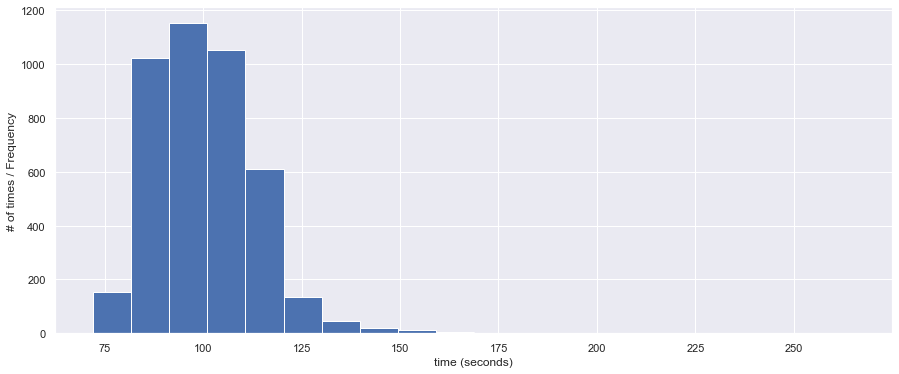

In [7]:
plt.figure(figsize=(15,6))
plt.hist(y,bins=20)
plt.ylabel('# of times / Frequency')
plt.xlabel('time (seconds)')

* Pretty much gaussian distribution


* Data is centered around 100.


* At least one outlier at 265s

### Checking if the things are changing over time

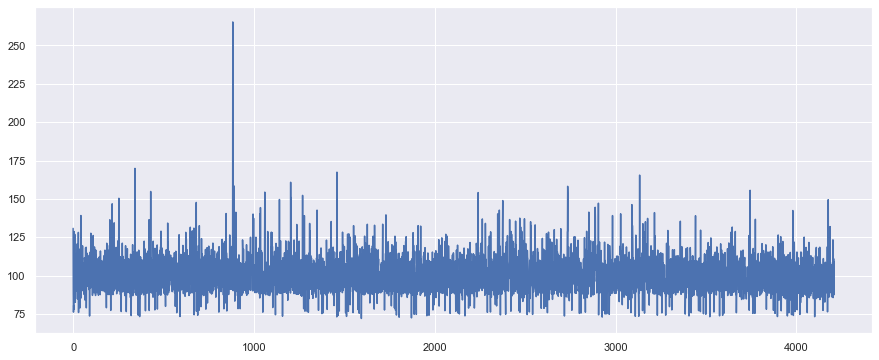

In [8]:
plt.figure(figsize=(15,6))
plt.plot(y)

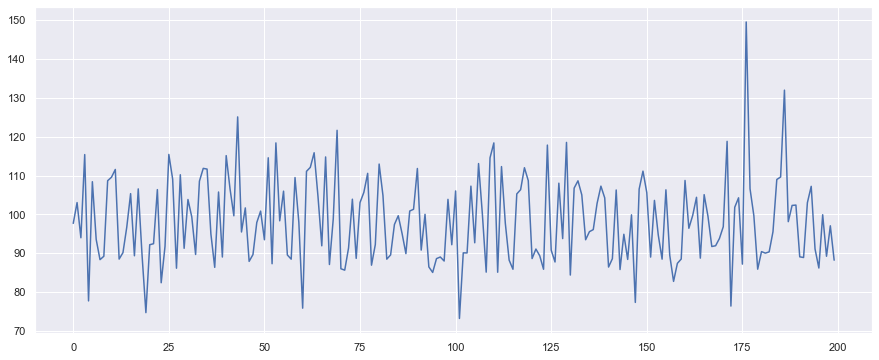

In [9]:
plt.figure(figsize=(15,6))
plt.plot(y[4000:4200])

### At the first glance the y series is not displaying any seasonality, cyclicity, and trend - so definitely not a time series

### Performing feature analysis

In [10]:
cols = [c for c in df.columns if 'X' in c]

print(f'Number of features : {len(cols)}')

print('Feature Types')

df[cols].dtypes.value_counts()

Number of features : 376
Feature Types


int64     368
object      8
dtype: int64

### Find Cardinality of dataset



In [11]:
counts = [[],[],[]]

for c in cols:
    typ = df[c].dtype
    
    uniq = len(np.unique(df[c]))
    
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)
        
print('Constant Features : {}  Binary Features : {} Categorical Features : {}\n'.format(*[len(c) for c in counts]))

print(f'Constant Features : {counts[0]}')
print(f'\n\n\nBinary Features : {counts[1]}')

print(f'\n\n\nBinary Features : {counts[2]}')

Constant Features : 12  Binary Features : 356 Categorical Features : 8

Constant Features : ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']



Binary Features : ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125

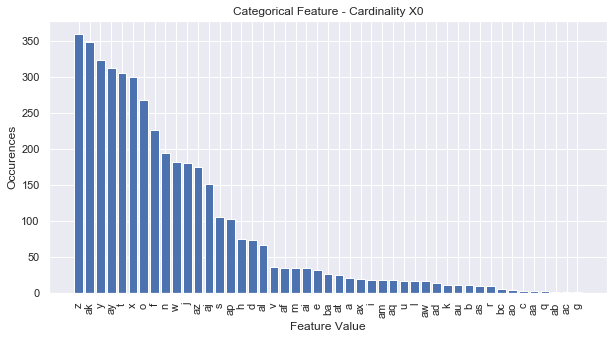

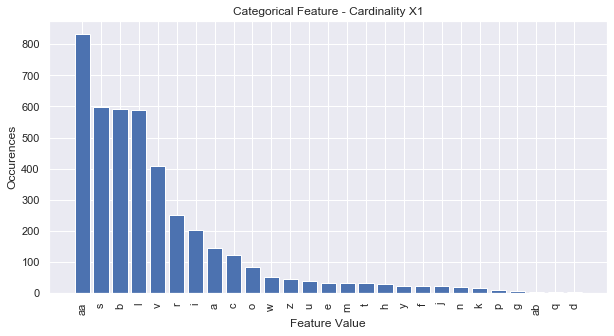

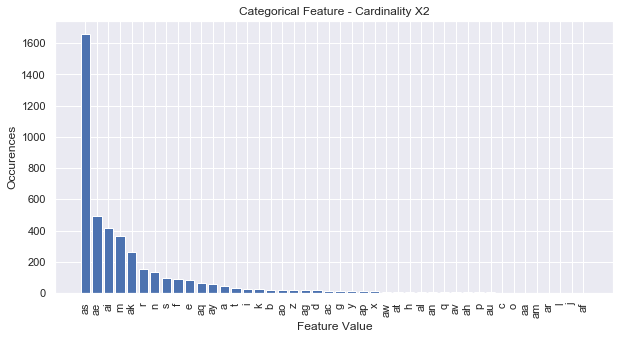

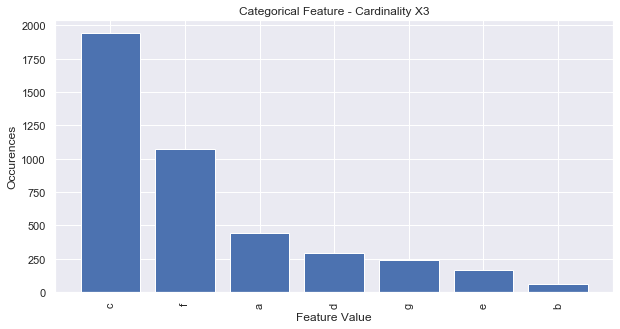

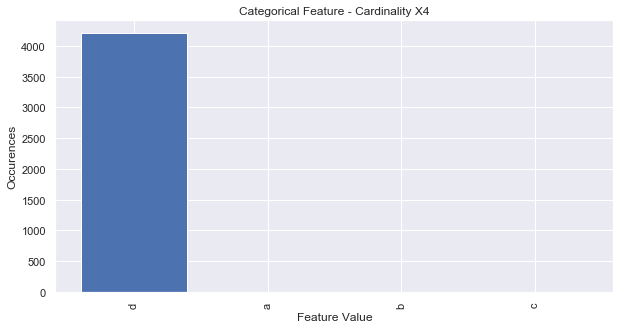

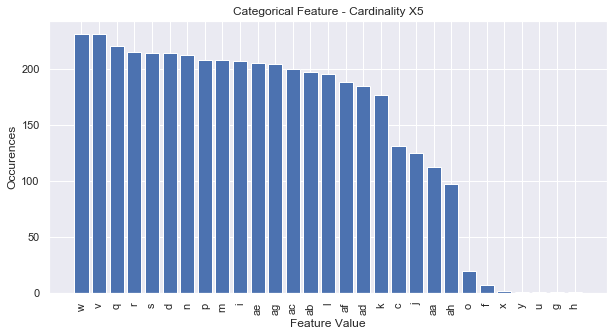

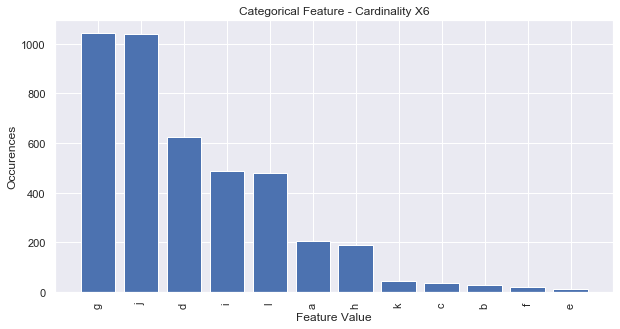

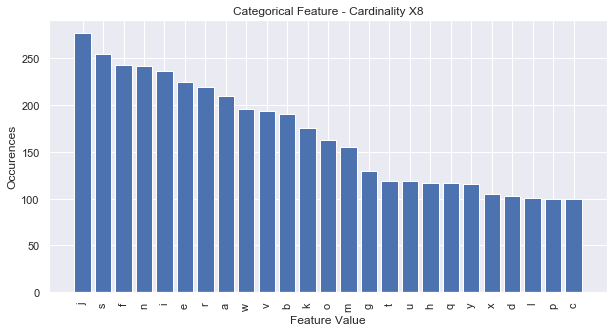

In [12]:
for c in counts[2]:
    value_counts = df[c].value_counts()
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    plt.title('Categorical Feature - Cardinality {}'.format(c,len(np.unique(df[c]))))
    
    plt.bar(range(len(value_counts)),value_counts.values)
    
    plt.xlabel('Feature Value')
    plt.ylabel('Occurences')
    
    ax.set_xticks(range(len(value_counts)))
    
    ax.set_xticklabels(value_counts.index,rotation='vertical')
    
    

## Modeling w XGBoost

In [13]:
dft = pd.read_csv('test.csv')

usable_col = list(set(df.columns)-set(['ID','y']))

X_train = df[usable_col]
X_test = dft[usable_col]

y_train = df['y'].values
id_test = df['ID'].values

for col in usable_col:
    cardinality = len(np.unique(X_train[col]))
    
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
        
    if cardinality>2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
df['X0'].nunique()

47

In [15]:
df['X11'].nunique()

1

In [16]:
df['X5'].head()

0    u
1    y
2    x
3    x
4    h
Name: X5, dtype: object

In [17]:
X_train['X5'].head()

0    117
1    121
2    120
3    120
4    104
Name: X5, dtype: int64

In [18]:
import xgboost as xgb

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

d_train = xgb.DMatrix(X_train,label = y_train)
d_valid = xgb.DMatrix(X_valid,label = y_valid)
d_test = xgb.DMatrix(X_test)

params = {}

params['objective'] = 'reg:linear'

params['eta'] = 0.02

params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)


watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2score, maximize=True, verbose_eval=10)



[21:55:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.9886	valid-rmse:98.8798	train-r2:-59.4871	valid-r2:-61.8155
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.0528	valid-rmse:80.9815	train-r2:-39.5535	valid-r2:-41.133
[20]	train-rmse:66.426	valid-rmse:66.3805	train-r2:-26.2375	valid-r2:-27.3095
[30]	train-rmse:54.5106	valid-rmse:54.4806	train-r2:-17.3423	valid-r2:-18.0693
[40]	train-rmse:44.8194	valid-rmse:44.7955	train-r2:-11.4001	valid-r2:-11.892
[50]	train-rmse:36.9556	valid-rmse:36.9296	train-r2:-7.4305	valid-r2:-7.76196
[60]	train-rmse:30.5948	valid-rmse:30.5629	train-r2:-4.77815	valid-r2:-5.00123
[70]	train-rmse:25.4735	valid-rmse:25.4291	train-r2:-3.00563	valid-r2:-3.15445
[80]	train-rmse:21.3766	valid-rmse:21.3191	train-r2:-1.82079	valid-r2:-1.92003
[90]	train-rmse:18.1256	valid-rmse:18

### Predictions

In [20]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test

pred['y'] = p_test

In [21]:
pred.head()

,ID,y
0,0,88.515915
1,6,104.233536
2,7,88.972939
3,9,76.732613
4,13,111.140244
